In [1]:
from pymatgen.io.espresso.PWscf import PWxml, PWin
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
import xml.etree.ElementTree as ET
from monty.io import zopen
import xmltodict
import numpy as np

# Sr3PbO 
noncolinear+SOC band structure

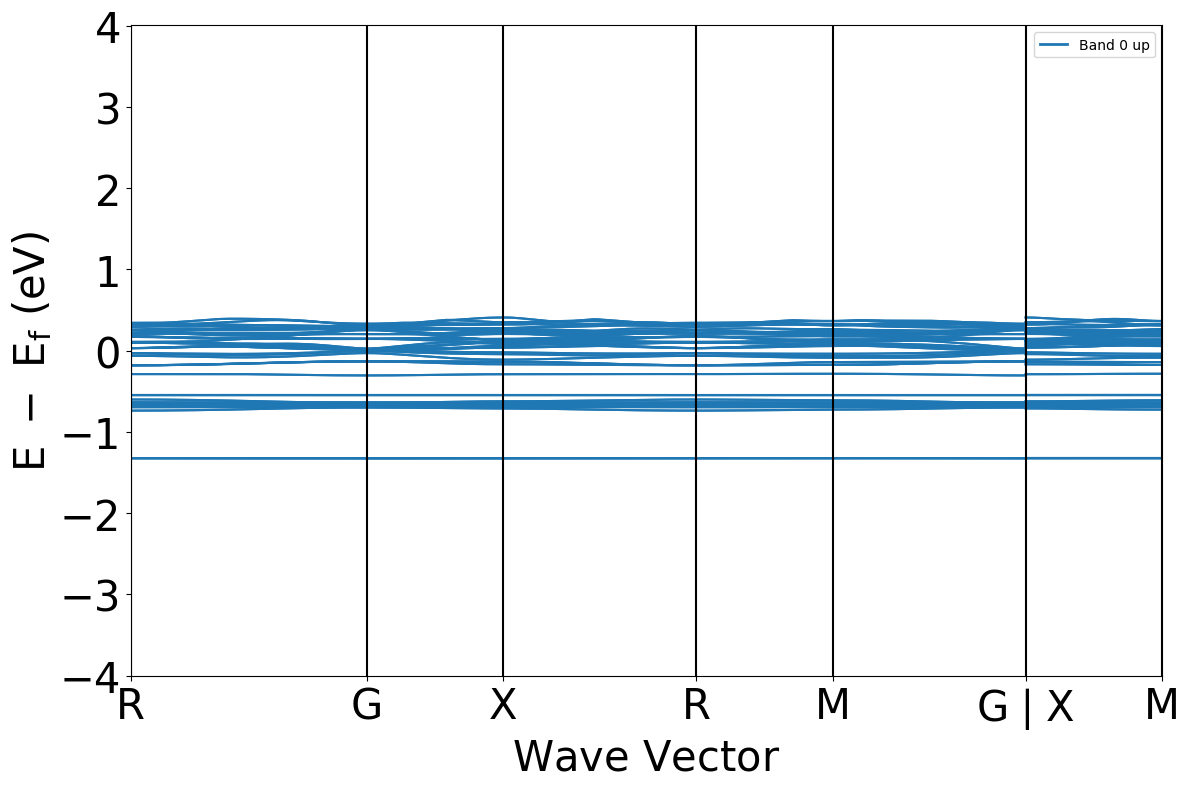

In [2]:
dir = 'Sr3PbO'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# Ni
collinear, spin-polarized bands, with ibrav = 2

the ibrav = 2 seems to cause issues with the actual kpoints computed are different from those in the K_POINTS card (symm. equiv)

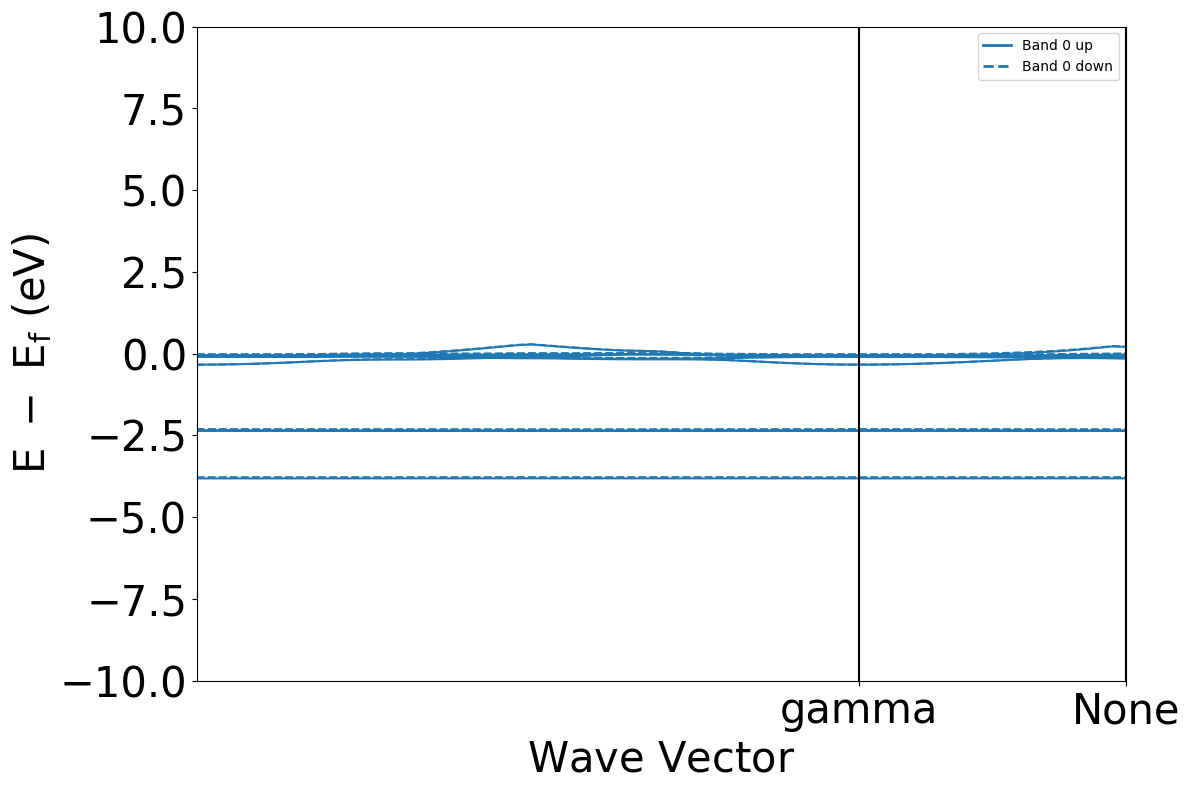

In [3]:
dir = 'Ni'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# FeO
collinear, spin-polarized scf, with DFT+U

In [4]:
dir = 'FeO'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/scf.xml'
pwxml = PWxml(xml_filename)
#print(pwin.to_str())

# MoS2
collinear scf, with vdW

In [5]:
dir = 'MoS2'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/scf.xml'
pwxml = PWxml(xml_filename)
#print(pwin.to_str())

# Debugging

In [6]:
dir = 'Sr3PbO'
calc = 'bands'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/{calc}.xml'
with open(xml_filename, encoding="UTF-8") as xml:
    data = xmltodict.parse(xml.read())['qes:espresso']

In [7]:
vasprun_filename = f'pymatgen/io/espresso/tests/data/{dir}/vasprun_{calc}.xml'
vasprun = Vasprun(vasprun_filename, parse_projected_eigen=True)
#kpoints_filename = 'pymatgen/io/espresso/tests/data/KPOINTS_Si_bands'
#bs = vasprun.get_band_structure(kpoints_filename=kpoints_filename)
#from pymatgen.electronic_structure.plotter import BSPlotter
#BSPlotter(bs).show()

/Users/ashour/code/pymatgen/pymatgen/io/vasp/outputs.py:1097: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/ashour/code/pymatgen-io-espresso/pymatgen/io/espresso/tests/data/Sr3PbO
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")


In [8]:
vasprun.projected_eigenvalues[Spin.up].shape

(316, 80, 5, 9)

In [9]:
str = 'K_POINTS {automatic}'
str = 'K_POINTS'
str.split()[0]

'K_POINTS'